In [1]:
import numpy as np
import easypde

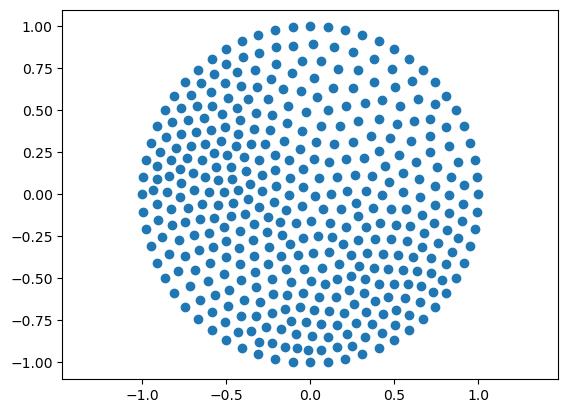

In [2]:
# Generate points in a disk
# np.random.seed(0)  # Uncomment this line if you want the result be same every time you run your code.
points = easypde.pointcloud.scatter_points_on_disk(400)

# Visualize points
easypde.plot_points(points)

In [3]:
# Construct the problem

A = np.zeros((len(points), len(points)))
b = np.zeros(len(points))
weight_distribution_radius = easypde.pointcloud.get_typical_distance(points)*0.1  # a parameter for calculating the matrix

for i, point in enumerate(points):
    x = point[0]
    y = point[1]
    
    if x**2+y**2>0.999:  # On boundary
        a = np.arctan2(x, y)
        easypde.edit_A_and_b(i, A, b, points, point,
                             5,  # number of neighbours for calculation
                             [1, 0, 0, 0, 0, 0],  # differential operator
                             value=np.cos(a*4),
                             weight_distribution_radius=weight_distribution_radius)
    else:  # Internal
        easypde.edit_A_and_b(i, A, b, points, point,
                             16,  # number of neighbours for calculation
                             [0, 0, 0, 1, 0, 1],  # differential operator
                             weight_distribution_radius=weight_distribution_radius)

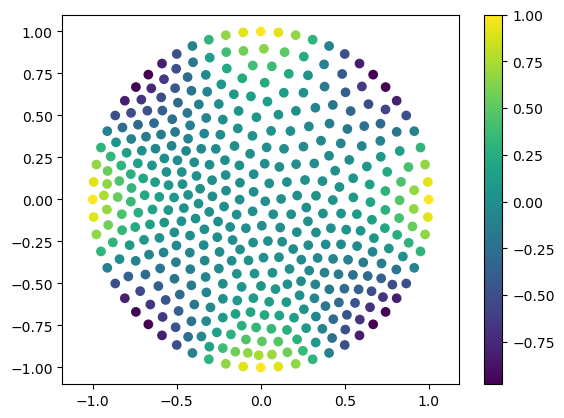

In [4]:
# Solve

solution = np.linalg.solve(A, b)

easypde.plot_points(points, field=solution)

In [ ]:
# Error analysis

r = np.sqrt(np.sum(np.square(points), axis=-1))
a = np.arctan2(points[:, 0], points[:, 1])
ground_truth = r**4*np.cos(4*a)
print(np.sqrt(np.mean(np.square(solution-ground_truth))))

0.0005365293539248217


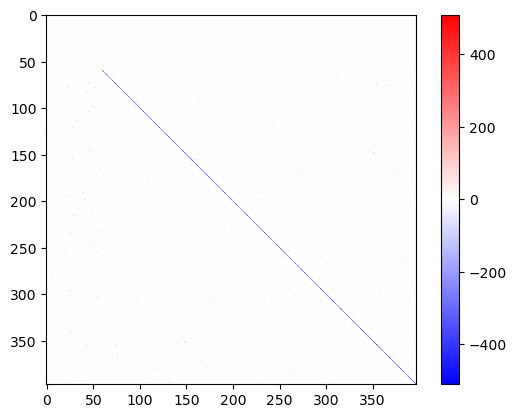

In [ ]:
# Visualize matrix

easypde.plot_matrix(A)